<a href="https://colab.research.google.com/github/yahuy1/CSE432/blob/main/Copy_of_CSE432_Inclass_exe_Ch4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Generate the Dataset

In this part we want to generate the data point for training.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

(-1.0, 1.0)

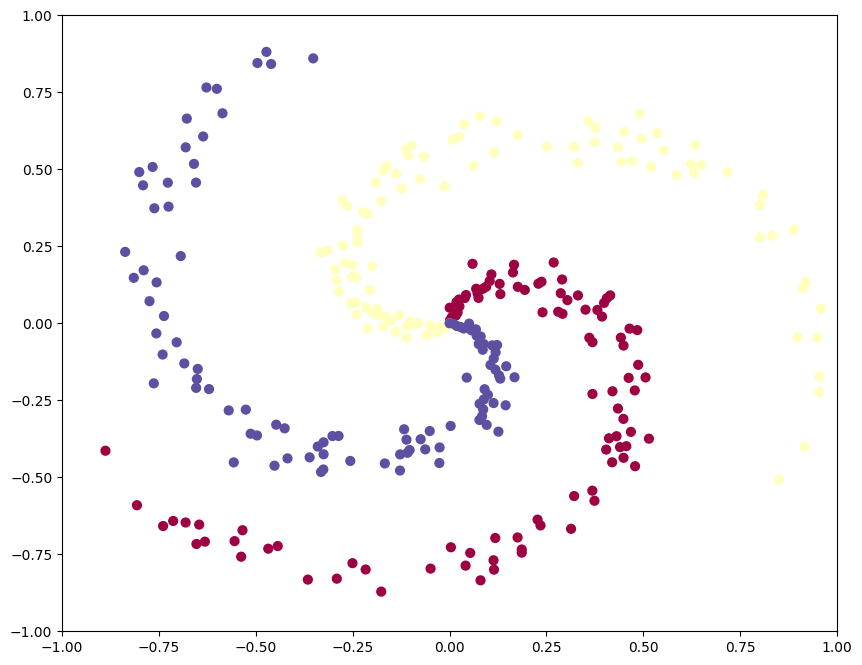

In [ ]:
np.random.seed(0)
N=100 # number of data point for each class
D=2  # number of demension 
K=3  # number of class
X=np.zeros((N*K,D))#2-D matrix 300 by 2
Y=np.zeros(N*K,dtype='uint8')#1-D vector, Label
for j in range(K):
  ix=range(N*j,N*(j+1))
  r=np.linspace(0.0,1,N)
  t=np.linspace(j*4,(j+1)*4,N)+np.random.randn(N)*0.2
  X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
  Y[ix]=j
fig=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim([-1,1])
plt.xlim([-1,1])


In [ ]:
print(X.shape)
print(Y.shape)
W=0.01*np.random.randn(D,K)
b=np.zeros((1,K))
scores=np.dot(X,W)
print(scores.shape)
print(b)
print(b.shape)

(300, 2)
(300,)
(300, 3)
[[0. 0. 0.]]
(1, 3)


# Step 2: Linear classifier (one layer NN)

In this part, we want to implement a linear classifier.

## The first step is to initialize the parameter W & b


In [ ]:
Hid = 100
W=0.01*np.random.randn(D, Hid)
b=np.zeros((1,Hid))
W2=0.01*np.random.randn(Hid,K)
b2=np.zeros((1,K))


# Please read the "Chapter 4.4 Neural Network Demos V2" (Page 37) to understand the following code. 

In [ ]:

print(W.shape)
print(X.shape)

step_size=1e-0 # learning rate
reg=1e-3 #lambda

num_examples=X.shape[0]
for i in range(200):
  #forward propagation 
  #y=(x*w+b) 
  h1=np.dot(X,W)
  h2=b+h1
  h3=np.maximum(0, h2)
  h4=np.dot(h3,W2)
  h5=h4+b2
  #softmax()
  exp_scores=np.exp(h5)
  s=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)

  #loss
  l1_all=-np.log(s[range(num_examples),Y])
  l1=np.sum(l1_all)/num_examples
  l3=np.sum(W*W)
  l4=reg*l3
  l5=np.sum(W2*W2)
  l6=reg*l5
  l2=l1+l4
  l=l2+l6
  if i%10==0:
    print("iteration %d: loss %f" % (i,l))

  #back propagation
  s[range(num_examples),Y]-=1 #we can not use dh2=s[range(num_examples),Y]-1
  dh5=s
  dh5/=num_examples
  dh4=dh5
  db2=np.sum(dh5, axis=0,keepdims=True)
  dh3=np.dot(dh4,W2.T)
  dW2=np.dot(h3.T,dh4)
  dh2=dh3
  dh2[h2<=0]=0
  db=dh2
  dh1=dh2
  dw=np.dot(X.T,dh1)
  db=np.sum(dh2, axis=0,keepdims=True)
  dl=1
  dl2=1
  dl3=reg 
  dl5=reg

  dw+=2*dl3*W
  dW2+=2*dl5*W2

  W+=-step_size*dw
  b+=-step_size*db
  W2+=-step_size*dW2
  b2+=-step_size*db2




(2, 100)
(300, 2)
iteration 0: loss 1.098751
iteration 10: loss 1.095554
iteration 20: loss 1.077689
iteration 30: loss 0.992793
iteration 40: loss 0.850925
iteration 50: loss 0.780449
iteration 60: loss 0.759798
iteration 70: loss 0.750383
iteration 80: loss 0.743202
iteration 90: loss 0.736798
iteration 100: loss 0.730822
iteration 110: loss 0.725052
iteration 120: loss 0.719480
iteration 130: loss 0.715498
iteration 140: loss 0.750058
iteration 150: loss 0.752998
iteration 160: loss 0.735118
iteration 170: loss 0.746207
iteration 180: loss 0.738791
iteration 190: loss 0.736888


In [ ]:
hidden_layer=np.maximum(0, np.dot(X, W)+b)
scores=np.dot(hidden_layer,W2)+b2
predicted_class=np.argmax(scores, axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class==Y)))


training accuracy: 0.63


(-1.8712034092398278, 1.8687965907601756)

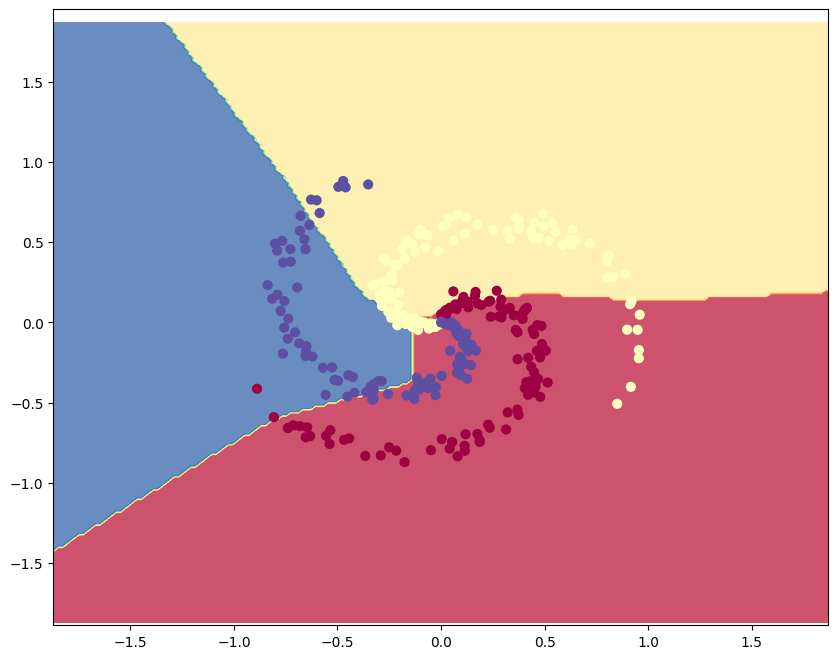

In [ ]:
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min() -1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
hidden_layer=np.maximum(0, np.dot(np.c_[xx.ravel(),yy.ravel()], W)+b)
Z=np.dot(hidden_layer,W2)+b2

# Z=np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)
fig=plt.figure()

plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())

In [ ]:
print(loss)

0.7959436153169146


# MNIST DATASET

https://colab.research.google.com/drive/1smEmXB196RIx5Q5c-yaR2MNLDRHO9PTM?usp=sharing#scrollTo=x1JRTuxiwqVa